# format_UV_4DIVAnd

In [1]:
import xarray as xr

In [2]:
from dask.distributed import LocalCluster
cluster = LocalCluster()

In [4]:
from dask.distributed import Client
client = Client(cluster)

In [5]:
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 4
Total threads: 12,Total memory: 32.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:56694,Workers: 4
Dashboard: /proxy/8787/status,Total threads: 12
Started: Just now,Total memory: 32.00 GiB
Comm: tcp://127.0.0.1:56709,Total threads: 3
Dashboard: /proxy/8787/status,Memory: 8.00 GiB
Nanny: tcp://127.0.0.1:56697,


In [6]:
DIVAnd_mapping = xr.open_mfdataset('./Test_Data/output/Water_body_Temp_GBR_Real_Depth.monthly.pfl.xbt.ctd.4Danl.with_ancillary.csiro_std_lvls.lx500.ly250.nc',parallel=True)

In [9]:
DIVAnd_mapping

<xarray.Dataset>
Dimensions:             (lon: 131, lat: 181, depth: 15, time: 12, nv: 2)
Coordinates:
  * lon                 (lon) float64 142.0 142.1 142.2 ... 154.8 154.9 155.0
  * lat                 (lat) float64 -28.0 -27.9 -27.8 ... -10.2 -10.1 -10.0
  * depth               (depth) float64 2.0 5.0 10.0 20.0 ... 100.0 110.0 120.0
  * time                (time) datetime64[ns] 2013-01-16 ... 2013-12-16
Dimensions without coordinates: nv
Data variables:
    climatology_bounds  (time, nv) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    Temp                (time, depth, lat, lon) float32 dask.array<chunksize=(12, 15, 181, 131), meta=np.ndarray>
    Temp_L1             (time, depth, lat, lon) float32 dask.array<chunksize=(12, 15, 181, 131), meta=np.ndarray>
    Temp_L2             (time, depth, lat, lon) float32 dask.array<chunksize=(12, 15, 181, 131), meta=np.ndarray>
    Temp_relerr         (time, depth, lat, lon) float32 dask.array<chunksize=(12, 15, 181, 131), meta=np.ndarray>
Attributes: (12/26)
    Conventions:            CF-1.6
    title:                  DIVAnd analysis of temperature
    file_name:              ./Test_Data/output/Water_body_Temp_GBR_Real_Depth...
    product_id:             e583e35c-2ce9-11ee-31d0-dbb12d9313df
    date:                   2023-07-28T11:55:58
    project:                SeaDataCloud
    ...                     ...
    abstract:               ...
    acknowledgement:        ...
    documentation:          https://doi.org/doi_of_doc
    doi:                    ...
    data_access:            http://sdn.oceanbrowser.net/data/SeaDataCloud-dom...
    WEB_visualisation:      http://sdn.oceanbrowser.net/web-vis/

In [14]:
BRAN2020_UV = xr.open_mfdataset('../src/data/BRAN2020_UV/AUSregion.BRAN2020.climatology.UV.nc',parallel=True)

In [15]:
BRAN2020_UV

<xarray.Dataset>
Dimensions:   (month: 12, st_ocean: 51, yu_ocean: 500, xu_ocean: 901)
Coordinates:
  * month     (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * st_ocean  (st_ocean) float64 2.5 7.5 12.5 ... 2.895e+03 3.603e+03 4.509e+03
  * xu_ocean  (xu_ocean) float64 90.0 90.1 90.2 90.3 ... 179.7 179.8 179.9 180.0
  * yu_ocean  (yu_ocean) float64 -50.0 -49.9 -49.8 -49.7 ... -0.4 -0.3 -0.2 -0.1
Data variables:
    u         (month, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(12, 51, 500, 901), meta=np.ndarray>
    v         (month, st_ocean, yu_ocean, xu_ocean) float32 dask.array<chunksize=(12, 51, 500, 901), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean Time: mean
    long_name:      i-current
    packing:        4
    standard_name:  sea_water_x_velocity
    time_avg_info:  average_T1,average_T2,average_DT
    units:          m/sec
    valid_range:    [-32767  32767]

# crop to GBR region used - plus one degree of padding

In [16]:
lat_max = DIVAnd_mapping.lat.max().values +1 
lat_min = DIVAnd_mapping.lat.min().values -1 
lon_max = DIVAnd_mapping.lon.max().values +1 
lon_min = DIVAnd_mapping.lon.min().values -1 

In [17]:
lon_lat_bounds = [lon_min,lon_max,lat_min,lat_max]

### rename coordinates

In [18]:
BRAN2020_UV = BRAN2020_UV.rename({'xu_ocean':'lon','yu_ocean':'lat','st_ocean':'depth'})
BRAN2020_UV

<xarray.Dataset>
Dimensions:  (month: 12, depth: 51, lat: 500, lon: 901)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth    (depth) float64 2.5 7.5 12.5 ... 2.895e+03 3.603e+03 4.509e+03
  * lon      (lon) float64 90.0 90.1 90.2 90.3 90.4 ... 179.7 179.8 179.9 180.0
  * lat      (lat) float64 -50.0 -49.9 -49.8 -49.7 -49.6 ... -0.4 -0.3 -0.2 -0.1
Data variables:
    u        (month, depth, lat, lon) float32 dask.array<chunksize=(12, 51, 500, 901), meta=np.ndarray>
    v        (month, depth, lat, lon) float32 dask.array<chunksize=(12, 51, 500, 901), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean Time: mean
    long_name:      i-current
    packing:        4
    standard_name:  sea_water_x_velocity
    time_avg_info:  average_T1,average_T2,average_DT
    units:          m/sec
    valid_range:    [-32767  32767]

In [19]:
UV_GBR = BRAN2020_UV.sel({'lon':slice(lon_min,lon_max),'lat':slice(lat_min,lat_max)})

In [20]:
UV_GBR 

<xarray.Dataset>
Dimensions:  (month: 12, depth: 51, lat: 201, lon: 151)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth    (depth) float64 2.5 7.5 12.5 ... 2.895e+03 3.603e+03 4.509e+03
  * lon      (lon) float64 141.0 141.1 141.2 141.3 ... 155.7 155.8 155.9 156.0
  * lat      (lat) float64 -29.0 -28.9 -28.8 -28.7 -28.6 ... -9.3 -9.2 -9.1 -9.0
Data variables:
    u        (month, depth, lat, lon) float32 dask.array<chunksize=(12, 51, 201, 151), meta=np.ndarray>
    v        (month, depth, lat, lon) float32 dask.array<chunksize=(12, 51, 201, 151), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean Time: mean
    long_name:      i-current
    packing:        4
    standard_name:  sea_water_x_velocity
    time_avg_info:  average_T1,average_T2,average_DT
    units:          m/sec
    valid_range:    [-32767  32767]

# GRIDDING

In [21]:
import xesmf as xe

In [22]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], DIVAnd_mapping.lat.values, {"units": "degrees_north"}),
        "lon": (["lon"], DIVAnd_mapping.lon.values, {"units": "degrees_east"}),
    }
)
ds_out

<xarray.Dataset>
Dimensions:  (lat: 181, lon: 131)
Coordinates:
  * lat      (lat) float64 -28.0 -27.9 -27.8 -27.7 ... -10.3 -10.2 -10.1 -10.0
  * lon      (lon) float64 142.0 142.1 142.2 142.3 ... 154.7 154.8 154.9 155.0
Data variables:
    *empty*

In [24]:
ds_in = xr.Dataset(
    {
        "lat": (["lat"], UV_GBR.lat.values, {"units": "degrees_north"}),
        "lon": (["lon"], UV_GBR.lon.values, {"units": "degrees_east"}),
    }
)
ds_in

<xarray.Dataset>
Dimensions:  (lat: 201, lon: 151)
Coordinates:
  * lat      (lat) float64 -29.0 -28.9 -28.8 -28.7 -28.6 ... -9.3 -9.2 -9.1 -9.0
  * lon      (lon) float64 141.0 141.1 141.2 141.3 ... 155.7 155.8 155.9 156.0
Data variables:
    *empty*

In [25]:
regridder = xe.Regridder(ds_in, ds_out, "conservative")
regridder  # print basic regridder information.

xESMF Regridder 
Regridding algorithm:       conservative 
Weight filename:            conservative_201x151_181x131.nc 
Reuse pre-computed weights? False 
Input grid shape:           (201, 151) 
Output grid shape:          (181, 131) 
Periodic in longitude?      False

In [26]:
UV_GBR_out = regridder(UV_GBR, keep_attrs=True)
UV_GBR_out

<xarray.Dataset>
Dimensions:  (month: 12, depth: 51, lat: 181, lon: 131)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * depth    (depth) float64 2.5 7.5 12.5 ... 2.895e+03 3.603e+03 4.509e+03
  * lat      (lat) float64 -28.0 -27.9 -27.8 -27.7 ... -10.3 -10.2 -10.1 -10.0
  * lon      (lon) float64 142.0 142.1 142.2 142.3 ... 154.7 154.8 154.9 155.0
Data variables:
    u        (month, depth, lat, lon) float32 dask.array<chunksize=(12, 51, 181, 131), meta=np.ndarray>
    v        (month, depth, lat, lon) float32 dask.array<chunksize=(12, 51, 181, 131), meta=np.ndarray>
Attributes:
    cell_methods:   time: mean Time: mean
    long_name:      i-current
    packing:        4
    standard_name:  sea_water_x_velocity
    time_avg_info:  average_T1,average_T2,average_DT
    units:          m/sec
    valid_range:    [-32767  32767]
    regrid_method:  conservative

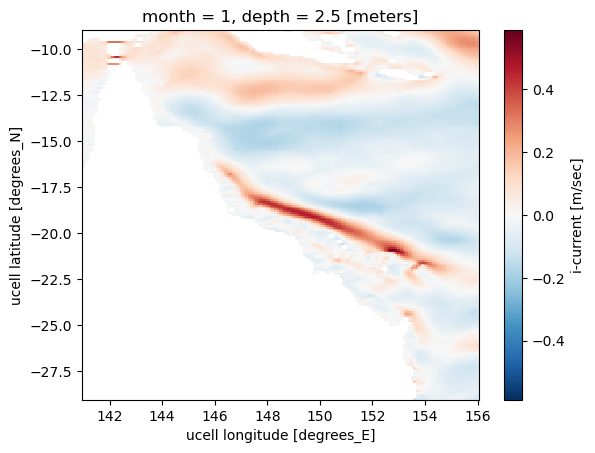

In [28]:
UV_GBR.isel({'month':0,'depth':0}).u.plot()

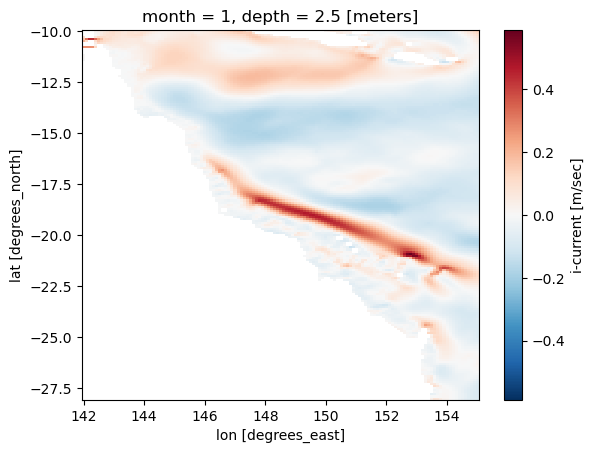

In [29]:
UV_GBR_out.isel({'month':0,'depth':0}).u.plot()